# Deep Learning for Embedded Systems

    Deep learning is a subset of machine learning that uses neural networks with multiple layers to model complex patterns in data. 

    When applied to embedded systems, deep learning enables these resource-constrained devices to perform tasks such as image recognition, speech processing, and sensor data analysis.

# Basics of Neural Networks

    A neural network is composed of layers of interconnected nodes, called neurons, that process input data and learn patterns through training. 
    
    These networks are inspired by the structure of the human brain and are capable of learning complex representations from data.

# Key Components of Neural Networks:

    1. Neurons: The fundamental units of a neural network. Each neuron receives inputs, processes them using weights, applies an activation function, and produces an output.

    2. Layers: Neural networks consist of multiple layers of neurons:

    Input Layer: Takes in the raw data features.

    Hidden Layers: Intermediate layers where computations are performed. The network can have multiple hidden layers, leading to a "deep" neural network.

    Output Layer: Produces the final prediction or classification result.

    3. Activation Functions: Activation functions introduce non-linearity into the network, enabling it to learn complex patterns. Common activation functions include:

    Sigmoid: Maps input values to the range (0, 1).

    Tanh (Hyperbolic Tangent): Maps input values to the range (-1, 1).

    ReLU (Rectified Linear Unit): Outputs 0 for negative inputs and the input itself for positive inputs.

    Softmax: Used in the output layer for multi-class classification, producing probabilities for each class.

# Building a Simple Neural Network with TensorFlow

    we'll build a simple neural network for a binary classification task using TensorFlow.

## Step 1: Import Required Libraries

In [6]:
!pip install numpy

In [ ]:
#!pip install tensorflow

In [1]:
import tensorflow as tf

In [7]:
import tensorflow.keras.models

#help(tensorflow.keras.models.Sequential)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Step 2: Create a Synthetic Dataset

# Generate a synthetic dataset

np.random.seed(42)

X = np.random.rand(1000, 2)  # 1000 samples, 2 features

y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target (0 or 1) based on a threshold

# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Step 3: Define the Neural Network Model

# Define a simple neural network model

model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    # Input layer with 2 features, 16 neurons, ReLU activation
    Dense(8, activation='relu'),          # Hidden layer with 8 neurons, ReLU activation
    Dense(1, activation='sigmoid')
    # Output layer with 1 neuron, Sigmoid activation (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 4: Train the Model

# Train the neural network model

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5353 - loss: 0.6927 - val_accuracy: 0.6143 - val_loss: 0.6731
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6105 - loss: 0.6716 - val_accuracy: 0.6857 - val_loss: 0.6519
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.6329 - loss: 0.6517 - val_accuracy: 0.6929 - val_loss: 0.6289
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7052 - loss: 0.6301 - val_accuracy: 0.7357 - val_loss: 0.6045
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7491 - loss: 0.5997 - val_accuracy: 0.7857 - val_loss: 0.5742
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7434 - loss: 0.5849 - val_accuracy: 0.8214 - val_loss: 0.5405
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7920 - loss: 0.5501 - val_accuracy: 0.8214 - val_loss: 0.5014
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.7941 - loss: 0.5136 - val_accuracy: 0.8786

In [14]:
# Step 5: Evaluate the Model

# Make predictions on the test set

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Test Accuracy: 0.96


# Key Points for Embedded Systems:

    Efficiency: Use lightweight architectures (e.g., fewer neurons and layers) to ensure the model runs efficiently on resource-constrained devices.

    Optimization: Convert the model to TensorFlow Lite format and apply quantization to optimize it for deployment on embedded systems.

# Introduction to TensorFlow Lite

    TensorFlow Lite (TFLite) is a lightweight, open-source framework designed for deploying machine learning models on resource-constrained devices such as embedded systems, microcontrollers, mobile phones, and IoT devices. 
    
    It allows you to run machine learning models efficiently on devices with limited computing power, memory, and storage.


## Why Use TensorFlow Lite for Embedded Systems?

    Lightweight and Optimized: TFLite models are smaller in size and optimized for inference on edge devices.

    Fast Inference: Designed to perform low-latency inference, making it suitable for real-time applications.

    Supports Quantization: Allows conversion of models to 8-bit integers, significantly reducing memory usage and increasing inference speed.

    Runs on Various Platforms: Supports a wide range of embedded hardware, including Raspberry Pi, Arduino, Android, iOS, and more.

In [1]:
pip install tflite-runtime

ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime
Note: you may need to restart the kernel to use updated packages.


# Part 1: Building and Training a Neural Network Model

    We'll build a simple neural network using TensorFlow/Keras on a desktop or laptop. 
    
    This model will be trained for a binary classification task, and then we will convert it to the TensorFlow Lite format for deployment on an embedded system.


## Step 1: Import Required Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Step 2: Create and Train the Neural Network Model

    We will use a synthetic dataset for binary classification.

In [3]:
# Generate a synthetic dataset

np.random.seed(42)

X = np.random.rand(1000, 2)  # 1000 samples, 2 features

y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target (0 or 1) based on a threshold

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),  # Input layer with 2 features, 16 neurons
    Dense(8, activation='relu'),                     # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid')                   # Output layer with 1 neuron (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5404 - loss: 0.6902 - val_accuracy: 0.6375 - val_loss: 0.6733
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.5736 - loss: 0.6736 - val_accuracy: 0.5875 - val_loss: 0.6515
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.5444 - loss: 0.6544 - val_accuracy: 0.6062 - val_loss: 0.6261
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.5494 - loss: 0.6418 - val_accuracy: 0.6500 - val_loss: 0.6014
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6006 - loss: 0.6204 - val_accuracy: 0.6687 - val_loss: 0.5774
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.6751 - loss: 0.5905 - val_accuracy: 0.6750 - val_loss: 0.5506
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7053 - loss: 0.5786 - val_accuracy: 0.7437 - val_loss: 0.5272
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.7558 - loss: 0.5329 - val_accuracy: 0.7937 - val_lo

# Part 2: Converting the Model to TensorFlow Lite Format

    Once the model is trained, convert it to TensorFlow Lite format.

## Step 3: Convert the Trained Model to TensorFlow Lite

In [4]:
# Convert the trained Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted to TensorFlow Lite format.")

INFO:tensorflow:Assets written to: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmp9pd716bp/assets


INFO:tensorflow:Assets written to: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmp9pd716bp/assets


Saved artifact at '/var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmp9pd716bp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  5981048272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262326672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262327824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262328784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262328016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262326864: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model has been successfully converted to TensorFlow Lite format.


W0000 00:00:1730119873.990508  562879 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1730119873.990997  562879 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-10-28 18:21:13.991767: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmp9pd716bp
2024-10-28 18:21:13.992093: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-28 18:21:13.992099: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmp9pd716bp
I0000 00:00:1730119873.995480  562879 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-10-28 18:21:13.995927: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-28 18:21:14.017234: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

# Optional: Apply Quantization to Optimize the Model

## Quantization reduces the model's size and increases inference speed, making it more suitable for embedded hardware.

In [5]:
# Apply post-training quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the quantized model
with open('model_quantized.tflite', 'wb') as f:
    f.write(tflite_quantized_model)

print("Model has been successfully quantized.")

INFO:tensorflow:Assets written to: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmpxn5of50z/assets


INFO:tensorflow:Assets written to: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmpxn5of50z/assets


Saved artifact at '/var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmpxn5of50z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  5981048272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262326672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262327824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262328784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262328016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6262326864: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model has been successfully quantized.


W0000 00:00:1730119927.782133  562879 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1730119927.782144  562879 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-10-28 18:22:07.782295: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmpxn5of50z
2024-10-28 18:22:07.782606: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-28 18:22:07.782611: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmpxn5of50z
2024-10-28 18:22:07.785353: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-28 18:22:07.802479: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmpxn5of50z
2024-10-28 18:22:07.807859: I tensorflow/cc/saved_model/loader.cc:

## Part 3: Deploying and Running the Model on an Embedded System

## Step 4: Transfer the Model to the Embedded Device

    Transfer the model.tflite or model_quantized.tflite file to the embedded device using scp, WinSCP, or any other file transfer method.

# Example command to transfer model file to Raspberry Pi

    scp model_quantized.tflite pi@raspberrypi.local:/home/pi/

# Step 5: Perform Inference with TensorFlow Lite on the Embedded Device

Install the TensorFlow Lite runtime as shown earlier, and use the following Python code to run inference on the embedded device:

In [9]:
import numpy as np

import tensorflow as tf

# Load the TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path="model_quantized.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Example input data (e.g., sensor data)
test_input = np.array([[0.4, 0.6]], dtype=np.float32)  # Modify with real sensor data

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_input)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
print(f"Predicted Output: {output_data}")

Predicted Output: [[0.59402907]]


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# Key Points for Embedded Systems:

### Quantization: Always quantize models to reduce size and improve inference speed on embedded hardware.

### Optimized Libraries: Use TensorFlow Lite runtime, which is designed for embedded and edge devices, to ensure efficient model execution.

### Inference Time: Test the inference time to ensure real-time performance, especially for applications like object detection, speech recognition, or predictive maintenance.

# Convolutional Neural Networks (CNNs) on Embedded Devices

    Convolutional Neural Networks (CNNs) are specialized deep learning architectures designed to process grid-like data, such as images and video frames. 
    
    They have revolutionized computer vision tasks, enabling machines to perform tasks like object detection, image classification, and facial recognition with high accuracy.

    Deploying CNNs on embedded devices, such as microcontrollers, Raspberry Pi, smartphones, and edge AI devices, allows you to perform real-time inference directly on the device without relying on cloud servers, which is critical for applications requiring low latency, privacy, or offline capabilities.


# Architecture of CNNs

    A typical CNN consists of several layers, each with a specific role in feature extraction and learning patterns. The key components are:

    1. Convolutional Layer:
    Applies convolutional filters (kernels) to input data to extract features such as edges, textures, and patterns.

    Output of this layer is called a feature map.

    2. Activation Function:

    Introduces non-linearity into the network, enabling it to learn complex patterns. The most commonly used activation function is ReLU (Rectified Linear Unit).

    3. Pooling Layer:

    Reduces the spatial dimensions of the feature maps (downsampling) while retaining the most important information, which helps in reducing computational complexity.

    Common pooling methods include Max Pooling and Average Pooling.

    4. Fully Connected (Dense) Layer:

    Connects every neuron from the previous layer to the next layer, typically used for final classification or regression tasks.

    5. Output Layer:

    Produces the final prediction, such as class probabilities in classification tasks, often using activation functions like Softmax for multi-class classification.

Input Image → [Convolution + Activation] → Pooling → [Convolution + Activation] → Pooling → Fully Connected Layer → Output

## Applications of CNNs in Embedded Environments

    CNNs have various applications in embedded systems, including but not limited to:

    Object Detection: Real-time detection of objects in images or video feeds (e.g., autonomous vehicles, security cameras, robotics).

    Image Classification: Identifying the category of an image (e.g., identifying fruits or animals in images for smart farming).

    Facial Recognition: Authenticating users based on facial features (e.g., door security systems, smart attendance systems).

    Anomaly Detection: Identifying defects or unusual patterns in industrial or medical images (e.g., identifying faults in machinery or detecting tumors in medical imaging).

    Gesture Recognition: Recognizing hand gestures or movements (e.g., smart home control systems, gaming devices).

## Deploying a Simple CNN on a Embedded Device Using TensorFlow Lite

    Step 1: Building and Training the CNN Model

    1.Train the CNN Model on Your Computer Using TensorFlow/Keras

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset (handwritten digit classification)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Reshape and normalize
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9209 - loss: 0.2550 - val_accuracy: 0.9848 - val_loss: 0.0423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9886 - loss: 0.0387 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9924 - loss: 0.0250 - val_accuracy: 0.9888 - val_loss: 0.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9874 - val_loss: 0.0412
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9929 - val_loss: 0.0258


In [5]:
# 2.Convert the Trained Model to TensorFlow Lite Format

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('cnn_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been successfully converted to TensorFlow Lite format.")

INFO:tensorflow:Assets written to: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmprmyj28ec/assets


INFO:tensorflow:Assets written to: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmprmyj28ec/assets


Saved artifact at '/var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmprmyj28ec'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  12985882320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985883664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985883856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985884432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985884624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985885200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985885392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12985885968: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1730892793.238215 1007534 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1730892793.238850 1007534 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


Model has been successfully converted to TensorFlow Lite format.


2024-11-06 17:03:13.239465: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmprmyj28ec
2024-11-06 17:03:13.239979: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-06 17:03:13.239985: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmprmyj28ec
I0000 00:00:1730892793.243984 1007534 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-11-06 17:03:13.244647: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-06 17:03:13.273639: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/tmprmyj28ec
2024-11-06 17:03:13.281210: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 41760 microsecond

# Step2:Deploying and Running the Model on Raspberry Pi

    ## 1.	Install TensorFlow Lite Runtime on Raspberry Pi

# pip install tflite-runtime
    2.	Run Inference Using the TensorFlow Lite Model on Raspberry Pi

In [7]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter =  tf.lite.Interpreter(model_path="cnn_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()

print(input_details)

output_details = interpreter.get_output_details()

print(output_details)

# Example: Load an image (28x28 grayscale) and preprocess

image = Image.open('/Users/surendra/Digit_Dataset/digits_jpeg/digits_jpeg/9/img010-01016.jpeg').convert('L').resize((28, 28))

#image = Image.open('/Users/surendra/Digit_Dataset/digits_jpeg/digits_jpeg/7/img008-01016.jpeg').convert('L').resize((28, 28))

# /Users/surendra/Digit_Dataset/digits_jpeg/digits_jpeg/8/img009-01016.jpeg

# /Users/surendra/Digit_Dataset/digits_jpeg/digits_jpeg/8/img009-01010.jpeg

#/Users/surendra/Digit_Dataset/digits_jpeg/digits_jpeg/7/img008-01016.jpeg

input_data = np.array(image, dtype=np.float32).reshape(1, 28, 28, 1) / 255.0

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Perform inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

predicted_label = np.argmax(output_data)

print(f"Predicted Digit: {predicted_label}")

[{'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([-1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall_1:0', 'index': 17, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Predicted Digit: 9


## Key Takeaways

    CNNs are powerful architectures for image-related tasks and have broad applications in embedded environments.

    Deploying CNNs on embedded devices involves using frameworks like TensorFlow Lite, which optimize models for resource-constrained hardware.

    Optimization Techniques (quantization, pruning, and model compression) are crucial to ensure CNNs run efficiently on devices with limited computational power.

# CNN Concepts: Convolution, Padding, Pooling, Max Pooling, Feature Map

    In Convolutional Neural Networks (CNNs), these operations are fundamental for feature extraction and dimensionality reduction. Let's break down these concepts and provide a TensorFlow example.

    Key Concepts:

    Convolution:

    Convolution involves applying a filter (kernel) to an input to produce a feature map.
    Filters detect features such as edges, textures, or patterns.
    
    Padding:

    Padding adds extra pixels around the input image to control the output size after convolution.

    Types:

    Same Padding: Keeps the output size the same as the input.

    Valid Padding: No padding is applied; reduces the output size.
    
    Pooling:

    Pooling reduces the spatial dimensions (width and height) of feature maps while retaining the most important information.

    Common types:

    Max Pooling: Takes the maximum value from a region.

    Average Pooling: Takes the average value from a region.
    
    Feature Map:

    The output of applying filters through convolutional layers, capturing the learned features of the input.
    Example: Implementing CNN Components Using TensorFlow

Convolution Kernel:
 [[[ 0.20381188]
  [-0.02460349]
  [-0.29725355]]

 [[-0.38751325]
  [ 0.11296785]
  [-0.1597004 ]]

 [[ 0.10404176]
  [ 0.5529591 ]
  [ 0.19280809]]]


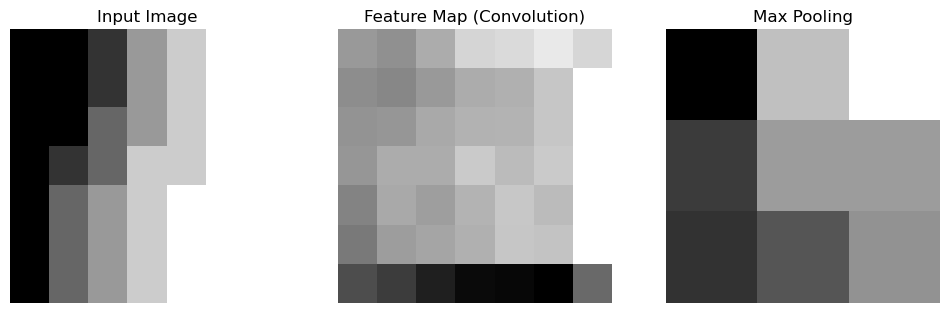

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple input image (7x7 grayscale image)

input_image = np.array([
    [1, 1, 2, 4, 5, 6, 6],
    [1, 1, 2, 4, 5, 6, 6],
    [1, 1, 3, 4, 5, 6, 6],
    [1, 2, 3, 5, 5, 6, 6],
    [1, 3, 4, 5, 6, 6, 6],
    [1, 3, 4, 5, 6, 6, 6],
    [1, 3, 4, 5, 6, 6, 6]
], dtype=np.float32)

input_image = input_image.reshape((1, 7, 7, 1))  # Reshape to (batch, height, width, channels)

# Define a convolutional layer with a 3x3 kernel
conv_layer = tf.keras.layers.Conv2D(
    filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', activation=None
)

# Apply convolution
conv_output = conv_layer(input_image)

conv_weights = conv_layer.get_weights()[0]  # Get the learned kernel

print("Convolution Kernel:\n", conv_weights[..., 0])

# Define a max pooling layer
max_pooling_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

# Apply max pooling
max_pooled_output = max_pooling_layer(conv_output)

# Visualization of the process
def plot_images(images, titles, cmap='gray'):
    plt.figure(figsize=(12, 4))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.title(title)
        plt.imshow(img, cmap=cmap)
        plt.axis('off')
    plt.show()

# Visualize input, feature map (convolution output), and max pooling result
plot_images(
    [
        input_image[0, :, :, 0],
        conv_output.numpy()[0, :, :, 0],
        max_pooled_output.numpy()[0, :, :, 0]
    ],
    ["Input Image", "Feature Map (Convolution)", "Max Pooling"]
)

# Explanation of the Code:

    Input Image:

    A small grayscale image (7x7) is created to demonstrate the operations.

    Convolution:

    A single filter (3x3) is applied to the input image.
   
    padding='same' ensures the output feature map has the same dimensions as the input.
    
    The learned kernel detects simple patterns or edges.

    Max Pooling:

    The max pooling layer with a 2x2 window and stride of 2 reduces the spatial dimensions by half.
    
    The output retains the most important feature values.

    Visualization:

    The input image, feature map after convolution, and max pooled output are plotted for better understanding.
    Outputs:

    Input Image: Original 7x7 matrix.

    Feature Map: Highlights patterns detected by the convolutional kernel.

    Max Pooled Output: 
    Smaller representation (3x3) that retains the strongest features from each 2x2 region.

    This demonstrates how convolution, padding, and pooling interact to extract and reduce features while retaining key information for further processing in a CNN.